In [192]:
import pandas as pd
import math

xk roots

In [193]:
x_k_4 = [
    0.52465, -0.52465,
    1.6507, -1.6507
]

x_k_7 = [
    0, 0.81629, -0.81629,
    1.6736, -1.6736,
    2.6520, -2.6520
]

derivative

In [194]:
# def derivative(f, x, n, dx=5e-2):
#     if n==1:
#         return (f(x + dx) - f(x - dx)) / (2.0 * dx)
#     else:
#         return (derivative(f, x+dx, n-1) - derivative(f, x-dx, n-1))/(2.0 * dx)

def chebderivative(x, n):
    if n == 4:
        return 64*x**3 - 96 * x
    if n == 7:
        return 896*x**6 - 6720*x**4 + 10080*x**2 - 1680

chebyshev/hermite polynomials

In [195]:
# def chebermit(x, n):
#     return (-1)**n * math.exp(x**2) * derivative(lambda x:math.exp(-x**2), x, n)

ak coefficients

In [196]:
def akcoeff(x, n):
    return (2**(n+1)*math.factorial(n)*math.sqrt(math.pi))/(chebderivative(x, n)**2)

calc ak for the xk for n 4 and 7

In [197]:
n4 = pd.DataFrame(
    {
        "x_k" : x_k_4
    }
)

n7 = pd.DataFrame(
    {
        "x_k" : x_k_7
    }
)


n4['Ak'] = n4['x_k'].apply(akcoeff, args=(4,))
n7['Ak'] = n7['x_k'].apply(akcoeff, args=(7,))

In [198]:
lambda0 = 6154.23
deltalambda = 0.123

def domaintransform(x):
    return lambda0 + x * deltalambda

In [200]:
n4['lambdas'] = n4['x_k'].apply(domaintransform)
n7['lambdas'] = n7['x_k'].apply(domaintransform)

In [201]:
linedata = pd.read_csv(
    "LINE6154.DAT", sep='\s+', 
    names=["wlength", "intensity"]
)

In [202]:
import numpy as np

nodelist = []

for value in n4['lambdas']:
    closest_index = (linedata['wlength'] - value).abs().idxmin()
    closest_row = list(linedata.loc[closest_index])
    nodelist.append(closest_row)
    
nodeframe = pd.DataFrame(
    nodelist,
    columns=['wlength', 'intensity']
)

nodeframe.reset_index(drop=True,inplace=True)
n4 = pd.concat([n4, nodeframe], axis=1)



In [203]:
nodelist = []

for value in n7['lambdas']:
    closest_index = (linedata['wlength'] - value).abs().idxmin()
    closest_row = list(linedata.loc[closest_index])
    nodelist.append(closest_row)
    
nodeframe = pd.DataFrame(
    nodelist,
    columns=['wlength', 'intensity']
)

nodeframe.reset_index(drop=True,inplace=True)
n7 = pd.concat([n7, nodeframe], axis=1)

In [204]:
def intensitytransform(x,y):
    return (1-x)/(math.exp(-y**2))

In [205]:
n4['value'] = n4.apply(lambda row: intensitytransform(row['intensity'], row['x_k']), axis=1)
n7['value'] = n7.apply(lambda row: intensitytransform(row['intensity'], row['x_k']), axis=1)

In [206]:
n4['product'] = n4['Ak'] * n4['value']
n7['product'] = n7['Ak'] * n7['value']

n4result = sum(n4['product']) * deltalambda
n7result = sum(n7['product']) * deltalambda
print(n4result, n7result)

0.29036460178282036 0.29128245408207876


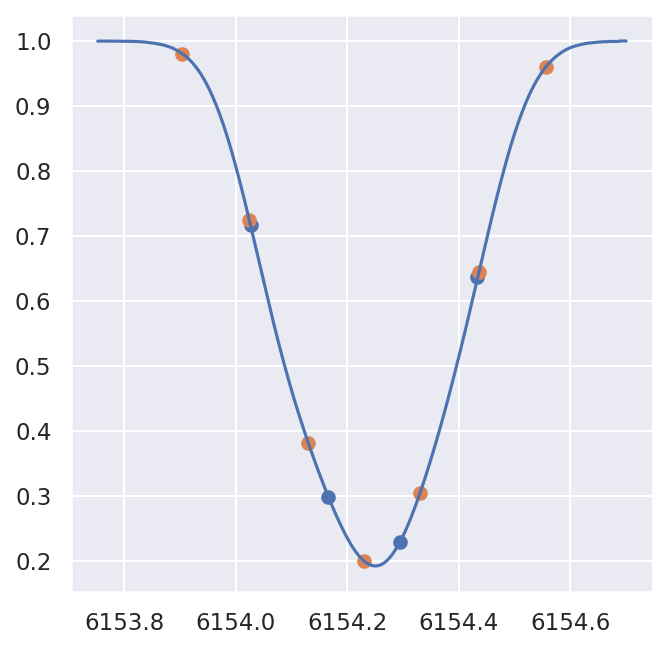

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")
plt.figure(figsize=(5,5), dpi=150)

plt.plot(linedata['wlength'], linedata['intensity'])
plt.scatter(n4['lambdas'], n4['intensity'])
plt.scatter(n7['lambdas'], n7['intensity'])

plt.show()

In [208]:
print(n4)
print(n4result)

       x_k        Ak      lambdas   wlength  intensity     value   product
0  0.52465  0.804910  6154.294532  6154.294    0.22925  1.014977  0.816966
1 -0.52465  0.804910  6154.165468  6154.166    0.29853  0.923745  0.743531
2  1.65070  0.081302  6154.433036  6154.434    0.63748  5.529707  0.449577
3 -1.65070  0.081302  6154.026964  6154.026    0.71728  4.312476  0.350614
0.29036460178282036


In [ ]:
print(n4)
print(n4result)

       x_k        Ak      lambdas   wlength  intensity     value   product
0  0.52465  0.804910  6154.294532  6154.294    0.22925  1.014977  0.816966
1 -0.52465  0.804910  6154.165468  6154.166    0.29853  0.923745  0.743531
2  1.65070  0.081302  6154.433036  6154.434    0.63748  5.529707  0.449577
3 -1.65070  0.081302  6154.026964  6154.026    0.71728  4.312476  0.350614
0.29036460178282036


In [209]:
print(n7)
print(n7result)

       x_k        Ak      lambdas   wlength  intensity      value   product
0  0.00000  0.810265  6154.230000  6154.230    0.20006   0.799940  0.648163
1  0.81629  0.425604  6154.330404  6154.330    0.30425   1.354679  0.576557
2 -0.81629  0.425604  6154.129596  6154.130    0.38139   1.204481  0.512632
3  1.67360  0.054498  6154.435853  6154.436    0.64486   5.845626  0.318575
4 -1.67360  0.054498  6154.024147  6154.024    0.72451   4.534582  0.247125
5  2.65200  0.000971  6154.556196  6154.556    0.96042  44.865659  0.043582
6 -2.65200  0.000971  6153.903804  6153.904    0.98046  22.149443  0.021516
0.29128245408207876
